In [1]:
import numpy
import os

import torch
import torch.nn as nn
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import torchvision

from PIL import Image
import pathlib
import matplotlib.image as Img
import matplotlib.pyplot as plt

In [5]:
path = "/home/revanth/cats_dogs/My-Projects/Cats_Dogs/Datasets/Cats_V1/training_set/training_set/"


In [6]:
cats = list(pathlib.Path(path).glob("cats/*"))
dogs = list(pathlib.Path(path).glob("dogs/*"))
total = cats+dogs

In [8]:
len(total)

8007

In [9]:
transform = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10),
    transforms.Resize(500),
    transforms.CenterCrop(500),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406],
                          [0.229, 0.224, 0.225])
])

In [10]:
batch = 128

model_data = torchvision.datasets.ImageFolder(path,transform=transform)
train_data = DataLoader(model_data,batch_size=batch,shuffle=True)

In [32]:
import torch.nn.functional as F
class CNN_model(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 3, 1)
        self.conv2 = nn.Conv2d(6, 16, 3, 1)
        self.conv3 = nn.Conv2d(16, 24, 3, 1)
        
        self.fc1   = nn.Linear(24*60*60, 300)
        self.fc2   = nn.Linear(300, 200)
        self.fc3   = nn.Linear(200, 2)
            
    def forward(self, X):
        X = F.relu(self.conv1(X))
        X = F.max_pool2d(X, 2, 2)
        
        X = F.relu(self.conv2(X))
        X = F.max_pool2d(X, 2, 2)
        
        X = F.relu(self.conv3(X))
        X = F.max_pool2d(X, 2, 2)
        
        # print(X.shape)
        X = X.view(-1, 24*60*60)
    
        X = F.relu(self.fc1(X))
        X = F.relu(self.fc2(X))
        X = self.fc3(X)
        
        X = F.softmax(X, dim= 1)
        return X

In [40]:
model = CNN_model()
optim = torch.optim.Adam(params=model.parameters(),lr=0.001)
loss = nn.CrossEntropyLoss()

# hist,loss1 = training_loop(20,model=model,optimizer=optim,loss_fn=loss,train_loader=train_dataset_loader,valid_dl=valid_dataset_loader)
device = "cuda" if torch.cuda.is_available() else "cpu"

model.to(device)
# loss.to(device)
history = []
loss_val = []
for epoch in range(20):
    loss_train = 0
    for img, label in train_data:
        img = img.to(device)
        label = label.to(device)
        output = model(img)
        # print(output.squeeze(-1).shape,output.squeeze(-1))
        # print(output)
        # print(label)
        loss1 = loss(output,label)
        # print(loss1)
        loss1.backward()
        optim.step()
        optim.zero_grad()
        
        loss_train+=loss1.item()
    loss_val.append(loss1)

    # if epoch == 1 or epoch % 10 == 0:
    # val = validation_step(valid_dataset_loader, model, loss)
    # print('{} Epoch {}, Training loss {}'.format(
    #     datetime.datetime.now(), epoch,
    #     loss_train / len(train_loader)))
    print(f"Epoch [{epoch}/{20}] => loss: {loss1}")



Epoch [0/20] => loss: 0.6379409432411194
Epoch [1/20] => loss: 0.6178370714187622
Epoch [2/20] => loss: 0.6545835733413696
Epoch [3/20] => loss: 0.604409396648407
Epoch [4/20] => loss: 0.5173750519752502
Epoch [5/20] => loss: 0.5810744166374207
Epoch [6/20] => loss: 0.5028723478317261
Epoch [7/20] => loss: 0.5712209343910217
Epoch [8/20] => loss: 0.5309414863586426
Epoch [9/20] => loss: 0.4653084874153137
Epoch [10/20] => loss: 0.565432071685791
Epoch [11/20] => loss: 0.5010316371917725
Epoch [12/20] => loss: 0.4516898989677429
Epoch [13/20] => loss: 0.4488590955734253
Epoch [14/20] => loss: 0.421384334564209
Epoch [15/20] => loss: 0.4727972745895386
Epoch [16/20] => loss: 0.46972447633743286
Epoch [17/20] => loss: 0.40196120738983154
Epoch [18/20] => loss: 0.49850696325302124
Epoch [19/20] => loss: 0.3881891965866089


In [41]:
for epoch in range(20):
    loss_train = 0
    for img, label in train_data:
        img = img.to(device)
        label = label.to(device)
        output = model(img)
        # print(output.squeeze(-1).shape,output.squeeze(-1))
        # print(output)
        # print(label)
        loss1 = loss(output,label)
        # print(loss1)
        loss1.backward()
        optim.step()
        optim.zero_grad()
        
        loss_train+=loss1.item()
    loss_val.append(loss1)

    # if epoch == 1 or epoch % 10 == 0:
    # val = validation_step(valid_dataset_loader, model, loss)
    # print('{} Epoch {}, Training loss {}'.format(
    #     datetime.datetime.now(), epoch,
    #     loss_train / len(train_loader)))
    print(f"Epoch [{epoch}/{20}] => loss: {loss1}")

Epoch [0/20] => loss: 0.4683746099472046
Epoch [1/20] => loss: 0.4839780032634735
Epoch [2/20] => loss: 0.45109450817108154
Epoch [3/20] => loss: 0.40174949169158936
Epoch [4/20] => loss: 0.41128137707710266
Epoch [5/20] => loss: 0.4479774534702301
Epoch [6/20] => loss: 0.42522794008255005
Epoch [7/20] => loss: 0.37646162509918213
Epoch [8/20] => loss: 0.37875720858573914
Epoch [9/20] => loss: 0.4441941976547241


KeyboardInterrupt: 

[0.6379409432411194, 0.6178370714187622, 0.6545835733413696, 0.604409396648407, 0.5173750519752502, 0.5810744166374207, 0.5028723478317261, 0.5712209343910217, 0.5309414863586426, 0.4653084874153137, 0.565432071685791, 0.5010316371917725, 0.4516898989677429, 0.4488590955734253, 0.421384334564209, 0.4727972745895386, 0.46972447633743286, 0.40196120738983154, 0.49850696325302124, 0.3881891965866089, 0.4683746099472046, 0.4839780032634735, 0.45109450817108154, 0.40174949169158936, 0.41128137707710266, 0.4479774534702301, 0.42522794008255005, 0.37646162509918213, 0.37875720858573914, 0.4441941976547241]


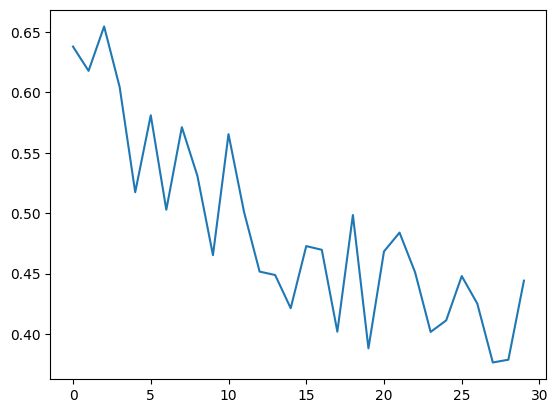

In [43]:
loss1 = []
for i in loss_val:
    loss1.append(i.item())
print(loss1)
plt.plot(range(len(loss1)),loss1)

In [25]:
test_transform = transforms.Compose([
    transforms.Resize(500),
    transforms.CenterCrop(500),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406],
                          [0.229, 0.224, 0.225])
])

In [26]:
test_path = "/home/revanth/cats_dogs/My-Projects/Cats_Dogs/Datasets/Cats_V1/test_set/test_set/"
batch = 128

model_test_data = torchvision.datasets.ImageFolder(test_path,transform=test_transform)
test_data = DataLoader(model_test_data,batch_size=batch,shuffle=False)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


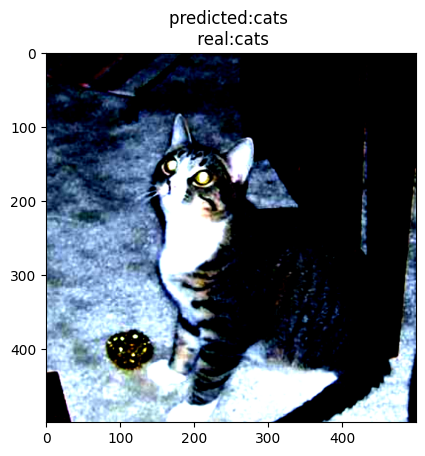

In [44]:
with torch.no_grad():
    test = []
    predicted = []

    for img,label in test_data:
        imgs = img[56].to(device)
        labels = label[56].to(device)
        test.append(labels)
        output_model = imgs.unsqueeze(0)
        # print(imgs.shape)
        output_model = model(output_model)
        # print(output_model)
        index = output_model.argmax()
        predicted.append(index)
        # imgs = torchvision.transforms.ToPILImage(imgs)
        plt.imshow(imgs.detach().cpu().numpy().transpose(1,2,0))
        plt.title(f"predicted:{ model_test_data.classes[index]} \n real:{ model_test_data.classes[labels]}")
        break

In [45]:
with torch.no_grad():
    correct = 0
    for X_test, y_test in test_data:
        X_test, y_test = X_test.to(device), y_test.to(device)
        y_val = model(X_test)
        predicted = torch.max(y_val,1)[1]
        correct += (predicted == y_test).sum()
        
print(f'Test accuracy: {correct.item()}/{len(model_test_data)} = {correct.item()*100/(len(model_test_data)):7.3f}%')

Test accuracy: 1594/2023 =  78.794%
